In [1]:
import pandas as pd
import numpy as np
import sweetviz
import saspy

from pycaret.classification import *
import multiprocessing
import pickle
import joblib

import time
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ModuleNotFoundError: No module named 'sweetviz'

In [2]:
SAS = saspy.SASsession(cfgname='iomcom')

SAS Connection established. Workspace UniqueIdentifier is 4C8FE934-8404-4FFE-AB24-EF2453EB581E



In [3]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (15,6)
pd.options.display.float_format = '{:,2f}'.format

Fecha = date.today()
Fecha = Fecha.strftime('%Y%m%d')

In [4]:
Base_PFCRED_VD = SAS.sasdata2dataframe(table='VENTAS_PFCRED_VD', libref='VENTASCC', method= 'MEMORY')

In [5]:
Base_PFCRED_VD.shape

(34317, 22)

In [6]:
Base_PFCRED_VD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34317 entries, 0 to 34316
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CaseID                         34317 non-null  object 
 1   CIF                            34317 non-null  object 
 2   Canal_Base                     34317 non-null  object 
 3   Fecha_Cosecha                  34317 non-null  float64
 4   tipo_oportunidad               34317 non-null  object 
 5   actividadEmpresa               34317 non-null  object 
 6   CondicionLaboral               34317 non-null  object 
 7   estadoCivil                    34317 non-null  object 
 8   IngresoConfirmado              34317 non-null  object 
 9   r_ingresoUtilizadoLimiteFinal  34317 non-null  object 
 10  nivelEducacion                 34317 non-null  object 
 11  Ocupacion                      34317 non-null  object 
 12  r_DTI                          34317 non-null 

In [7]:
Base_PFCRED_VD['CaseID'] = Base_PFCRED_VD['CaseID'].fillna(0)
Base_PFCRED_VD['CIF'] = Base_PFCRED_VD['CIF'].fillna(0)
Base_PFCRED_VD['Canal_Base'] = Base_PFCRED_VD['Canal_Base'].fillna(0)
Base_PFCRED_VD['Fecha_Cosecha'] = Base_PFCRED_VD['Fecha_Cosecha'].fillna(0)
Base_PFCRED_VD['tipo_oportunidad'] = Base_PFCRED_VD['tipo_oportunidad'].fillna(0)
Base_PFCRED_VD['actividadEmpresa'] = Base_PFCRED_VD['actividadEmpresa'].fillna(0)
Base_PFCRED_VD['CondicionLaboral'] = Base_PFCRED_VD['CondicionLaboral'].fillna(0)
Base_PFCRED_VD['estadoCivil'] = Base_PFCRED_VD['estadoCivil'].fillna(0)
Base_PFCRED_VD['IngresoConfirmado'] = Base_PFCRED_VD['IngresoConfirmado'].fillna(0)
Base_PFCRED_VD['r_ingresoUtilizadoLimiteFinal'] = Base_PFCRED_VD['r_ingresoUtilizadoLimiteFinal'].fillna(0)
Base_PFCRED_VD['nivelEducacion'] = Base_PFCRED_VD['nivelEducacion'].fillna(0)
Base_PFCRED_VD['Ocupacion'] = Base_PFCRED_VD['Ocupacion'].fillna(0)
Base_PFCRED_VD['r_DTI'] = Base_PFCRED_VD['r_DTI'].fillna(0)
Base_PFCRED_VD['r_exposicionMaximaCliente'] = Base_PFCRED_VD['r_exposicionMaximaCliente'].fillna(0)
Base_PFCRED_VD['r_flagBancarizado'] = Base_PFCRED_VD['r_flagBancarizado'].fillna(0)
Base_PFCRED_VD['r_semaforoFinal'] = Base_PFCRED_VD['r_semaforoFinal'].fillna(0)
Base_PFCRED_VD['r_semaforoScoreBuro'] = Base_PFCRED_VD['r_semaforoScoreBuro'].fillna(0)
Base_PFCRED_VD['sexo'] = Base_PFCRED_VD['sexo'].fillna(0)
Base_PFCRED_VD['Edad'] = Base_PFCRED_VD['Edad'].fillna(0)
Base_PFCRED_VD['FLAG'] = Base_PFCRED_VD['FLAG'].fillna(0)
Base_PFCRED_VD['FG_APLICA'] = Base_PFCRED_VD['FG_APLICA'].fillna(0)
Base_PFCRED_VD['LocationChannel'] = Base_PFCRED_VD['LocationChannel'].fillna(0)


Base_PFCRED_VD = Base_PFCRED_VD.astype({'CaseID': 'string',
                              'CIF': 'string', 
                              'Canal_Base': 'string', 
                              'Fecha_Cosecha': 'int16', 
                              'tipo_oportunidad': 'string', 
                              'actividadEmpresa': 'string', 
                              'CondicionLaboral': 'string', 
                              'estadoCivil': 'string', 
                              'IngresoConfirmado': 'string', 
                              'r_ingresoUtilizadoLimiteFinal': 'string', 
                              'nivelEducacion': 'string', 
                              'Ocupacion': 'string', 
                              'r_DTI': 'string', 
                              'r_exposicionMaximaCliente': 'string', 
                              'r_flagBancarizado': 'string', 
                              'r_semaforoFinal': 'string', 
                              'r_semaforoScoreBuro': 'string', 
                              'sexo': 'string', 
                              'Edad': 'int16', 
                              'FLAG': 'string', 
                              'FG_APLICA': 'int16',
                              'LocationChannel': 'string'})

In [8]:
Base_PFCRED_VD.head(4)

CaseID           CIF     Canal_Base  Fecha_Cosecha  \
0  NG00859233  RAMICARLM019  Venta Directa           5693   
1  NG00885221  LOPEMARCT012  Venta Directa           5693   
2  NG00885245  ESCOFELIS000  Venta Directa           5693   
3  NG00885251  BO  JORGS000  Venta Directa           5693   

            tipo_oportunidad            actividadEmpresa  \
0  TRÁMITE SIN DOCUMENTACIÓN                               
1  TRÁMITE SIN DOCUMENTACIÓN  OP-OTRAS EMPRESAS PRIVADAS   
2  TRÁMITE SIN DOCUMENTACIÓN  OP-OTRAS EMPRESAS PRIVADAS   
3  TRÁMITE SIN DOCUMENTACIÓN                               

            CondicionLaboral estadoCivil IngresoConfirmado  \
0                 ASALARIADO                                 
1                 ASALARIADO     SOLTERO            3498.0   
2                 ASALARIADO     SOLTERO            3066.0   
3  PROFESIONAL INDEPENDIENTE                                 

                       r_ingresoUtilizadoLimiteFinal  ...  \
0                                                ...  ...   
1                                                ...  ...   
2                                                ...  ...   
3                                             3500.0  ...   

                                               r_DTI  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                0.0   

  r_exposicionMaximaCliente r_flagBancarizado r_semaforoFinal  \
0                   11900.0                 Y      VerdeClaro   
1                     600.0                 N   ValorEspecial   
2                     600.0                 N       RojoClaro   
3                                           N                   

  r_semaforoScoreBuro sexo Edad    FLAG  FG_APLICA LocationChannel  
0          VerdeClaro        40                  0   VENTA DIRECTA  
1       ValorEspecial    M   29  APLICA          1   VENTA DIRECTA  
2           RojoClaro    M   37                  0   VENTA DIRECTA  
3                            39                  0   VENTA DIRECTA  

[4 rows x 22 columns]

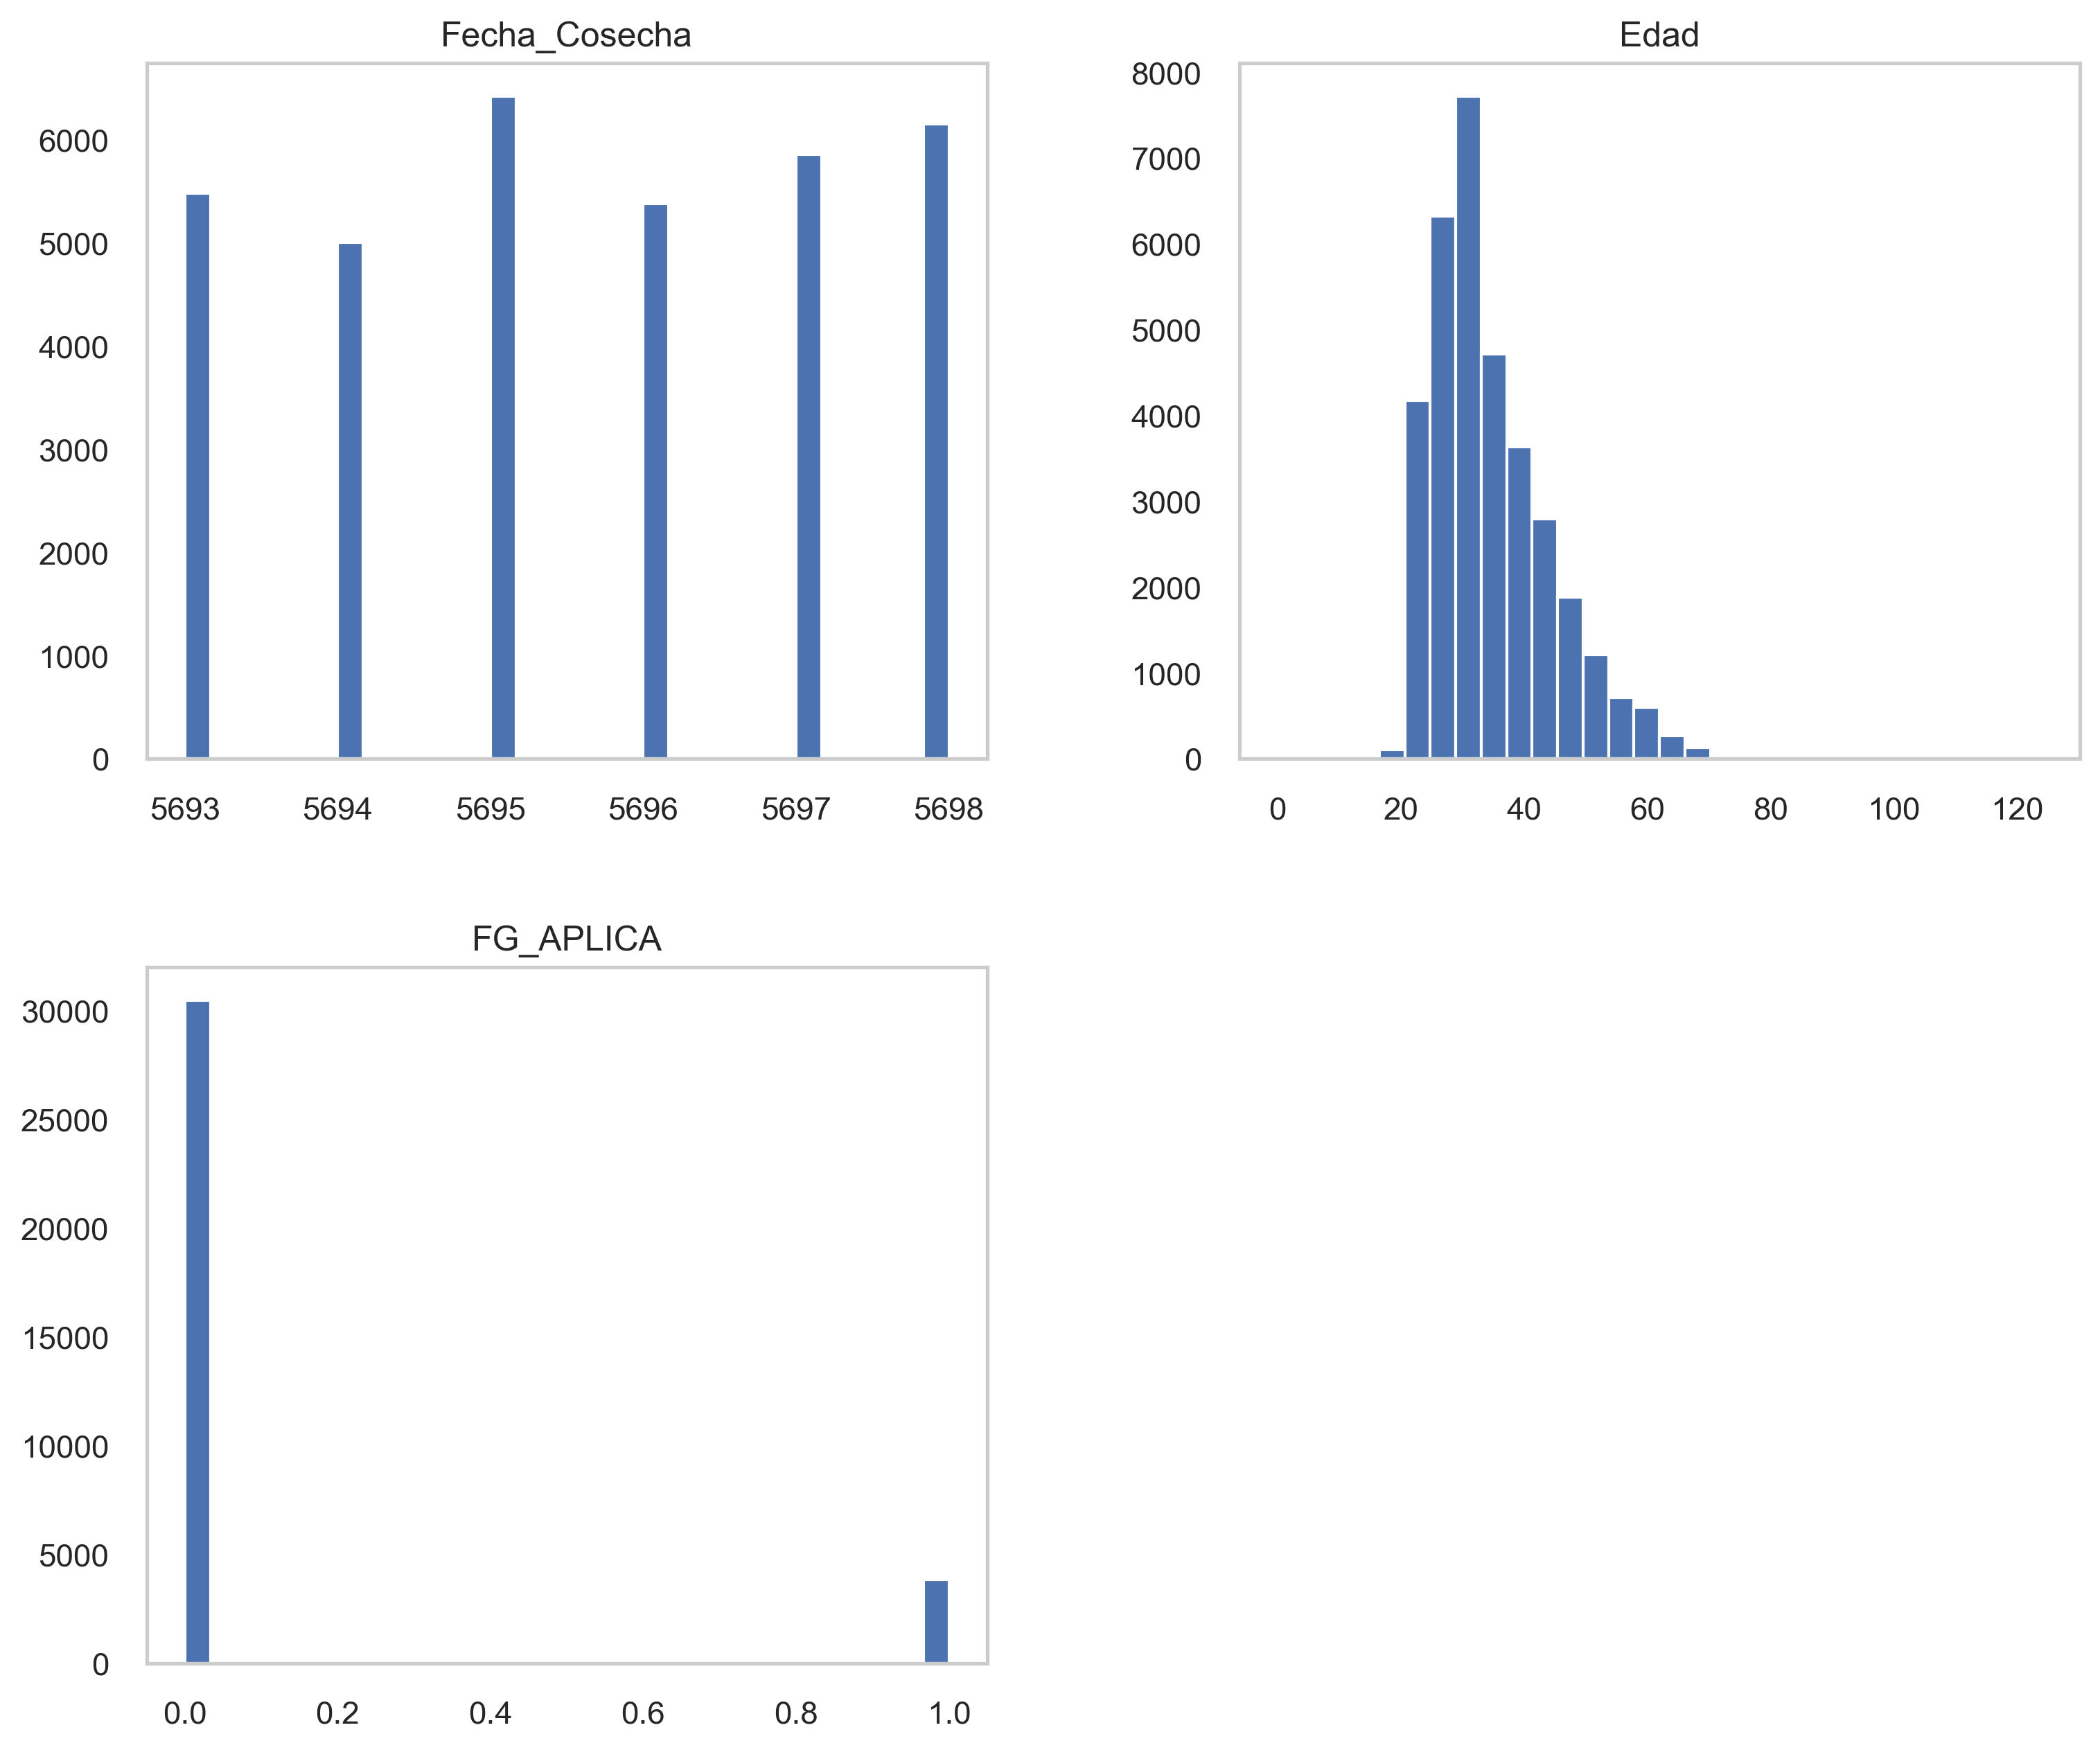

In [9]:
Base_PFCRED_VD.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

In [10]:
labelencoder_X_1 = LabelEncoder()
Base_PFCRED_VD.iloc[:, 4] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 4])
Base_PFCRED_VD.iloc[:, 5] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 5])
Base_PFCRED_VD.iloc[:, 6] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 6])
Base_PFCRED_VD.iloc[:, 7] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 7])
Base_PFCRED_VD.iloc[:, 10] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 10])
Base_PFCRED_VD.iloc[:, 11] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 11])
Base_PFCRED_VD.iloc[:, 14] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 14])
Base_PFCRED_VD.iloc[:, 15] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 15])
Base_PFCRED_VD.iloc[:, 16] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 16])
Base_PFCRED_VD.iloc[:, 17] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 17])
Base_PFCRED_VD.iloc[:, 21] = labelencoder_X_1.fit_transform(Base_PFCRED_VD.iloc[:, 21])


Base_PFCRED_VD.info()
Base_PFCRED_VD.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34317 entries, 0 to 34316
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CaseID                         34317 non-null  string
 1   CIF                            34317 non-null  string
 2   Canal_Base                     34317 non-null  string
 3   Fecha_Cosecha                  34317 non-null  int16 
 4   tipo_oportunidad               34317 non-null  int32 
 5   actividadEmpresa               34317 non-null  int32 
 6   CondicionLaboral               34317 non-null  int32 
 7   estadoCivil                    34317 non-null  int32 
 8   IngresoConfirmado              34317 non-null  string
 9   r_ingresoUtilizadoLimiteFinal  34317 non-null  string
 10  nivelEducacion                 34317 non-null  int32 
 11  Ocupacion                      34317 non-null  int32 
 12  r_DTI                          34317 non-null  string
 13  r

CaseID           CIF     Canal_Base  Fecha_Cosecha  tipo_oportunidad  \
0  NG00859233  RAMICARLM019  Venta Directa           5693                 2   
1  NG00885221  LOPEMARCT012  Venta Directa           5693                 2   
2  NG00885245  ESCOFELIS000  Venta Directa           5693                 2   
3  NG00885251  BO  JORGS000  Venta Directa           5693                 2   
4  NG00885257                Venta Directa           5693                 2   

   actividadEmpresa  CondicionLaboral  estadoCivil IngresoConfirmado  \
0                 0                 1            0                     
1                16                 1            4            3498.0   
2                16                 1            4            3066.0   
3                 0                 4            0                     
4                 0                 1            0                     

                       r_ingresoUtilizadoLimiteFinal  ...  \
0                                                ...  ...   
1                                                ...  ...   
2                                                ...  ...   
3                                             3500.0  ...   
4                                                ...  ...   

                                               r_DTI  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                0.0   
4                                                ...   

   r_exposicionMaximaCliente r_flagBancarizado r_semaforoFinal  \
0                    11900.0                 2               8   
1                      600.0                 1               7   
2                      600.0                 1               4   
3                                            1               0   
4                     2200.0                 2               8   

   r_semaforoScoreBuro  sexo  Edad    FLAG  FG_APLICA LocationChannel  
0                    8     0    40                  0               1  
1                    7     2    29  APLICA          1               1  
2                    4     2    37                  0               1  
3                    0     0    39                  0               1  
4                    8     0    26                  0               1  

[5 rows x 22 columns]

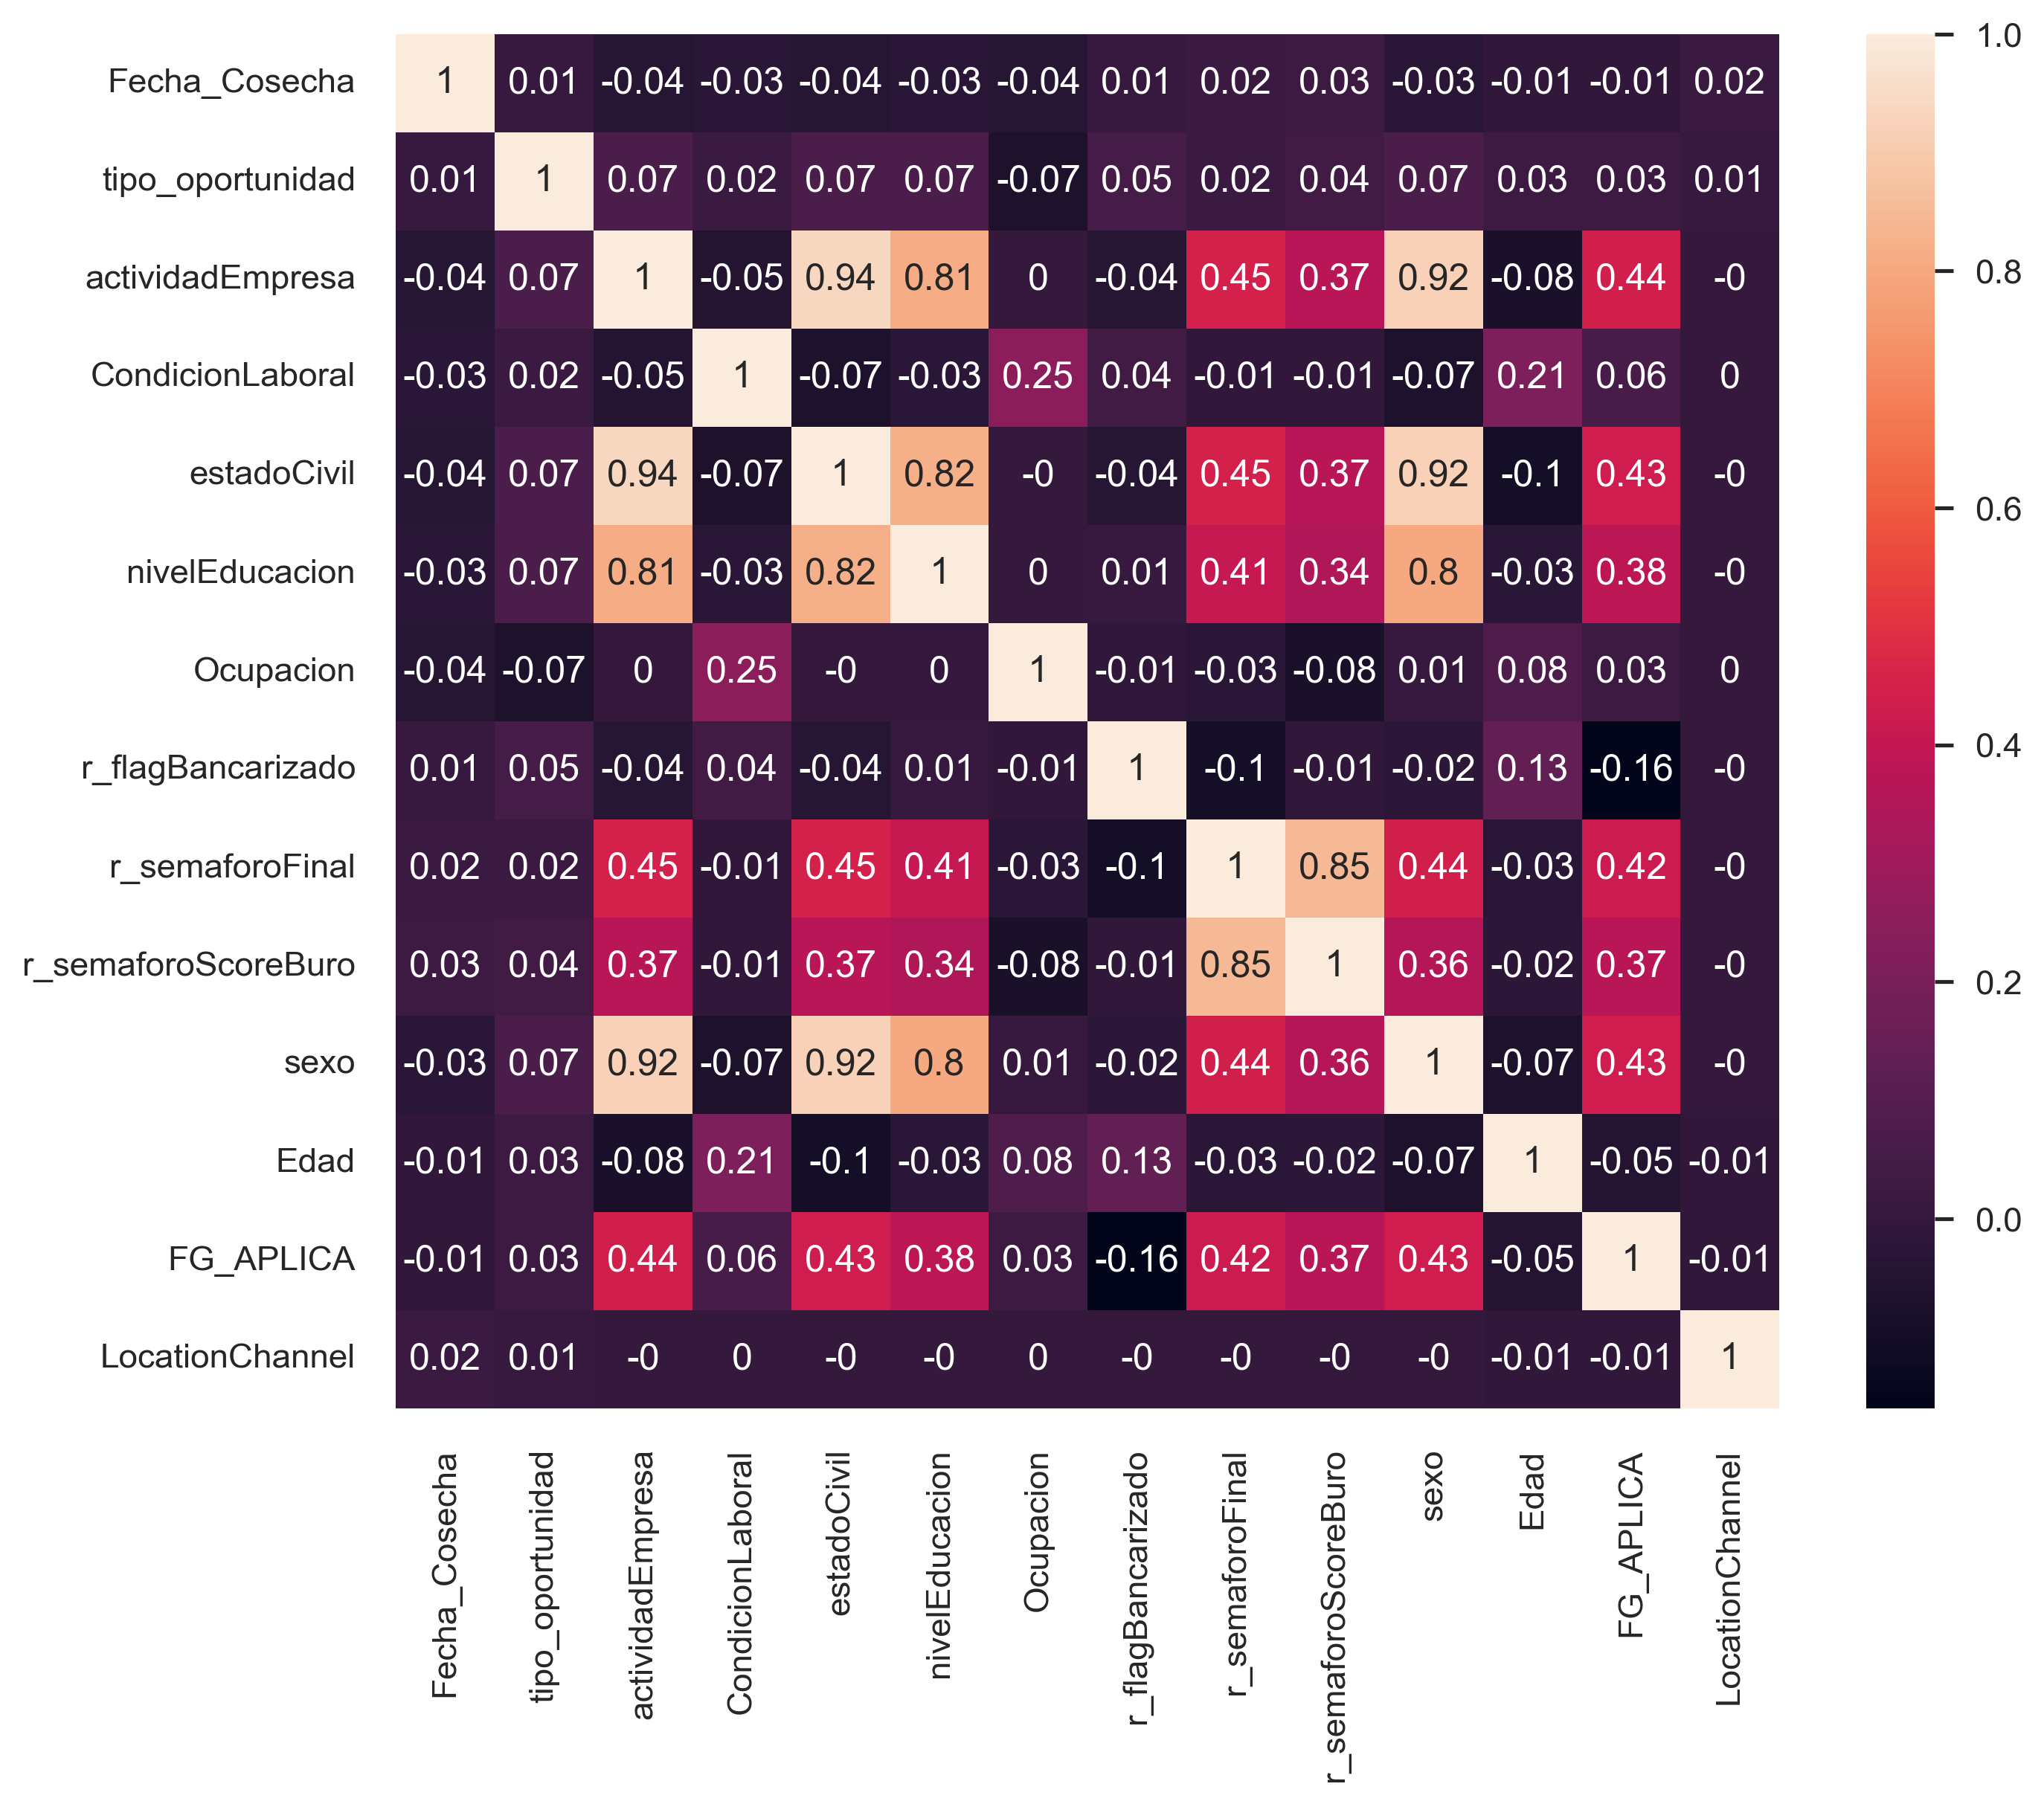

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(Base_PFCRED_VD.corr().round(decimals=2), annot=True)
plt.show()

In [12]:
Base_PFCRED_VD.drop(['CaseID','CIF','Canal_Base','Fecha_Cosecha','IngresoConfirmado',
                     'r_ingresoUtilizadoLimiteFinal','FLAG','r_DTI','r_exposicionMaximaCliente','LocationChannel'],
                axis='columns',
                inplace=True)
Base_PFCRED_VD.info()
Base_PFCRED_VD.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34317 entries, 0 to 34316
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   tipo_oportunidad     34317 non-null  int32
 1   actividadEmpresa     34317 non-null  int32
 2   CondicionLaboral     34317 non-null  int32
 3   estadoCivil          34317 non-null  int32
 4   nivelEducacion       34317 non-null  int32
 5   Ocupacion            34317 non-null  int32
 6   r_flagBancarizado    34317 non-null  int32
 7   r_semaforoFinal      34317 non-null  int32
 8   r_semaforoScoreBuro  34317 non-null  int32
 9   sexo                 34317 non-null  int32
 10  Edad                 34317 non-null  int16
 11  FG_APLICA            34317 non-null  int16
dtypes: int16(2), int32(10)
memory usage: 1.4 MB


tipo_oportunidad  actividadEmpresa  CondicionLaboral  estadoCivil  \
0                 2                 0                 1            0   
1                 2                16                 1            4   
2                 2                16                 1            4   
3                 2                 0                 4            0   
4                 2                 0                 1            0   

   nivelEducacion  Ocupacion  r_flagBancarizado  r_semaforoFinal  \
0               0         36                  2                8   
1               2        211                  1                7   
2               7         19                  1                4   
3               0          8                  1                0   
4               0        216                  2                8   

   r_semaforoScoreBuro  sexo  Edad  FG_APLICA  
0                    8     0    40          0  
1                    7     2    29          1  
2                    4     2    37          0  
3                    0     0    39          0  
4                    8     0    26          0

In [13]:
cluster = setup(Base_PFCRED_VD, session_id = 7652)

In [15]:
model = create_model('kmeans', num_clusters=5)

In [16]:
plot_model(model, 'cluster')

In [17]:
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

Transformation Pipeline and Model Successfully Saved


tipo_oportunidad  actividadEmpresa  CondicionLaboral  estadoCivil  \
0                 2                 0                 1            0   
1                 2                16                 1            4   
2                 2                16                 1            4   
3                 2                 0                 4            0   
4                 2                 0                 1            0   
5                 2                16                 5            4   
6                 2                16                 1            4   
7                 2                 0                 5            0   
8                 2                 0                 1            0   
9                 2                16                 4            4   

   nivelEducacion  Ocupacion  r_flagBancarizado  r_semaforoFinal  \
0               0         36                  2                8   
1               2        211                  1                7   
2               7         19                  1                4   
3               0          8                  1                0   
4               0        216                  2                8   
5               1          8                  2                8   
6               7        214                  2                8   
7               0          8                  2                0   
8               0        150                  2                0   
9               7          8                  1                4   

   r_semaforoScoreBuro  sexo  Edad  FG_APLICA    Cluster  
0                    8     0    40          0  Cluster 0  
1                    7     2    29          1  Cluster 1  
2                    4     2    37          0  Cluster 3  
3                    0     0    39          0  Cluster 3  
4                    8     0    26          0  Cluster 1  
5                    8     2    32          0  Cluster 3  
6                    8     2    25          0  Cluster 1  
7                    0     0    49          0  Cluster 3  
8                    0     0    40          0  Cluster 2  
9                    4     1    28          0  Cluster 3

In [18]:
results.to_excel('CLUSTERS_PFCRED_VD_V2.xlsx', sheet_name='BASE_CLUSTERS', index=False)